<a href="https://colab.research.google.com/github/Lakshayakanna123/datascience_and_algorithms/blob/main/loan_data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Data.csv to Loan_Data.csv


In [ ]:
import pandas as pd

# Load the dataset

data = pd.read_csv('Loan_Data.csv')

# Display the first few rows of the dataset
print(data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
# Display the structure of the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Describe the dataset
data_description = data.describe()
print(data_description)


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


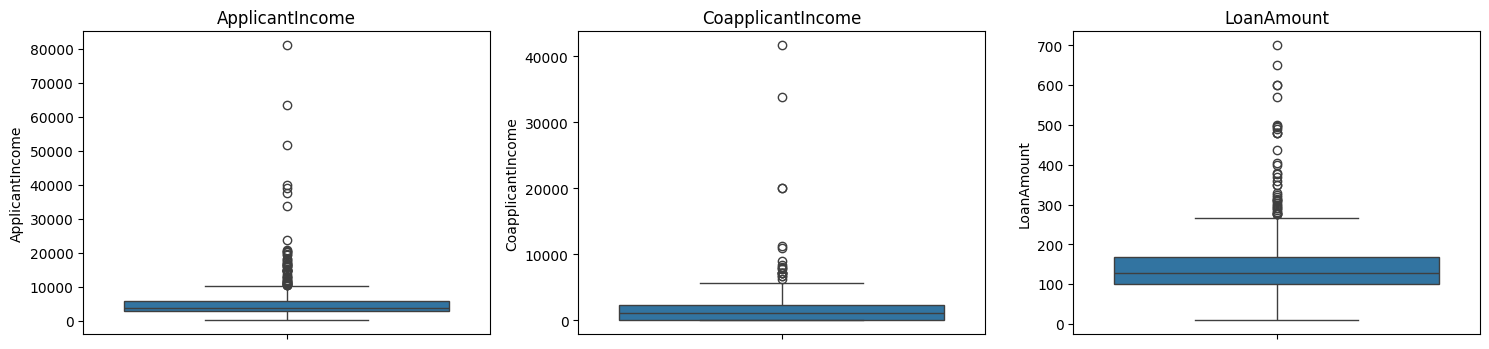

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the visualization
plt.figure(figsize=(15, 10))

# List of numerical columns to plot - replace with your actual column names!
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
for column in numerical_columns:
    data = remove_outliers(data, column)

# Display the dataset after removing outliers
print(data.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       502.000000         502.000000  502.000000        488.000000   
mean       3989.643426        1321.157211  123.498008        341.926230   
std        1787.257585        1399.117681   41.058099         67.388197   
min         150.000000           0.000000   17.000000         12.000000   
25%        2751.250000           0.000000   98.250000        360.000000   
50%        3585.500000        1293.500000  120.000000        360.000000   
75%        4757.250000        2197.000000  150.750000        360.000000   
max       10000.000000        5701.000000  240.000000        480.000000   

       Credit_History  
count      462.000000  
mean         0.841991  
std          0.365145  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
# Define a function to cap outliers
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply the function to each numerical column
for column in numerical_columns:
    data = cap_outliers(data, column)

# Display the dataset after capping outliers
print(data.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       502.000000         502.000000  502.000000        488.000000   
mean       3991.947052        1317.981195  123.414701        341.926230   
std        1769.699827        1389.649143   40.581135         67.388197   
min        1025.000000           0.000000   30.050000         12.000000   
25%        2751.250000           0.000000   98.250000        360.000000   
50%        3585.500000        1293.500000  120.000000        360.000000   
75%        4757.250000        2197.000000  150.750000        360.000000   
max        9701.570000        5301.940000  217.980000        480.000000   

       Credit_History  
count      462.000000  
mean         0.841991  
std          0.365145  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
import numpy as np

# Apply log transformation to each numerical column
for column in numerical_columns:
    data[column] = np.log1p(data[column])

# Display the dataset after transformation
print(data.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       502.000000         502.000000  502.000000        488.000000   
mean          8.201144           4.395167    4.761780        341.926230   
std           0.428703           3.786661    0.372736         67.388197   
min           6.933423           0.000000    3.435599         12.000000   
25%           7.920174           0.000000    4.597632        360.000000   
50%           8.184932           7.165867    4.795791        360.000000   
75%           8.467635           7.695300    5.022230        360.000000   
max           9.180146           8.576017    5.388980        480.000000   

       Credit_History  
count      462.000000  
mean         0.841991  
std          0.365145  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a simple dataset
np.random.seed(42)
data = pd.DataFrame({
    'feature': np.concatenate([np.random.normal(loc=50, scale=5, size=100), np.array([100, 105, 110])])
})

print(data.describe())


          feature
count  103.000000
mean    51.097832
std     10.417334
min     36.901274
25%     47.092684
50%     49.639949
75%     52.639569
max    110.000000


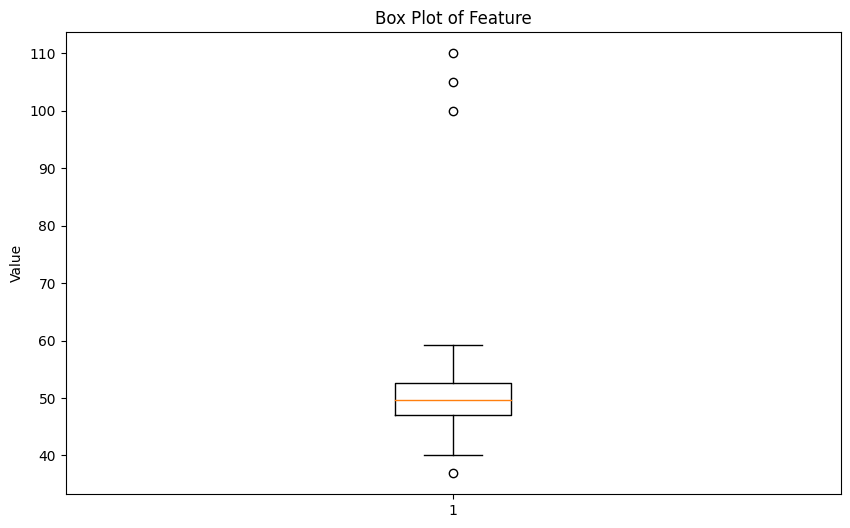

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['feature'])
plt.title('Box Plot of Feature')
plt.ylabel('Value')
plt.show()


In [ ]:
z_scores = np.abs(stats.zscore(data['feature']))
outliers_z = data[(z_scores > 3)]
print("Outliers using Z-score method:\n", outliers_z)


Outliers using Z-score method:
      feature
100    100.0
101    105.0
102    110.0


In [ ]:
Q1 = data['feature'].quantile(0.25)
Q3 = data['feature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['feature'] < lower_bound) | (data['feature'] > upper_bound)]
print("Outliers using IQR method:\n", outliers_iqr)


Outliers using IQR method:
         feature
74    36.901274
100  100.000000
101  105.000000
102  110.000000


In [ ]:
data_cleaned = data[(z_scores <= 3)]
print("Data after removing outliers using Z-score method:\n", data_cleaned.describe())

# OR

data_cleaned = data[(data['feature'] >= lower_bound) & (data['feature'] <= upper_bound)]
print("Data after removing outliers using IQR method:\n", data_cleaned.describe())


Data after removing outliers using Z-score method:
           feature
count  100.000000
mean    49.480767
std      4.540842
min     36.901274
25%     46.995472
50%     49.365219
75%     52.029760
max     59.261391
Data after removing outliers using IQR method:
          feature
count  99.000000
mean   49.607833
std     4.381621
min    40.062155
25%    47.092684
50%    49.421759
75%    52.181030
max    59.261391


In [ ]:
# Using mean
data_transformed = data.copy()
mean_value = data['feature'].mean()
data_transformed['feature'][(z_scores > 3)] = mean_value
print("Data after transforming outliers using mean:\n", data_transformed.describe())

# Using median
data_transformed = data.copy()
median_value = data['feature'].median()
data_transformed['feature'][(z_scores > 3)] = median_value
print("Data after transforming outliers using median:\n", data_transformed.describe())


Data after transforming outliers using mean:
           feature
count  103.000000
mean    49.527866
std      4.481904
min     36.901274
25%     47.092684
50%     49.639949
75%     51.843335
max     59.261391
Data after transforming outliers using median:
           feature
count  103.000000
mean    49.485404
std      4.473648
min     36.901274
25%     47.092684
50%     49.639949
75%     51.843335
max     59.261391
